# Breast Cancer identification with Logistic Regression classifier

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## Loading the Data

### Wisconsin Breast Cancer Data Set

In [2]:
cancer_data = load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_data.data, cancer_data.target,stratify = cancer_data.target,
    shuffle = True,random_state=144)


## Creating and training the model

In [4]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Analyze model performance and metrics

In [5]:
print("Training set accuracy (score):\t{:.3f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy (score):\t{:.3f}".format(logreg.score(X_test, y_test)))

Training set accuracy (score):	0.962
Test set accuracy (score):	0.958


In [6]:
pred_logreg = logreg.predict(X_test)

In [7]:
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[48  5]
 [ 1 89]]


In [8]:
f1_score(y_test, pred_logreg)

0.9673913043478262

In [9]:
print(classification_report(y_test, pred_logreg,
target_names=["malignant", "benign"]))

              precision    recall  f1-score   support

   malignant       0.98      0.91      0.94        53
      benign       0.95      0.99      0.97        90

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



## Feature scalling for improving model performance

In [10]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
logreg_scaled = logreg.fit(X_train_scaled, y_train)
print("Train set accuracy (score):\t{:.2f}".format(logreg_scaled.score(X_train_scaled, y_train)))
print("Test set accuracy (score):\t{:.2f}".format(logreg_scaled.score(X_test_scaled, y_test)))


Train set accuracy (score):	0.99
Test set accuracy (score):	0.97


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.decision_function(X_test))

In [13]:
thresholds

array([ -291.09984552,  -292.09984552,  -689.44097901,  -701.22983634,
        -711.1233783 ,  -712.00736031,  -984.54016662,  -994.91634991,
        -997.80276082, -1002.82983348, -1022.96281721, -1067.12689089,
       -1080.62180764, -1086.6301455 , -1191.99529065, -3882.06716811])

In [14]:
np.argmin(np.abs(thresholds))

0

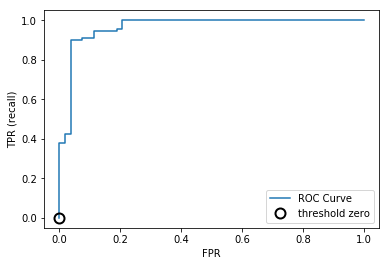

In [15]:
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
nearest_to_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[nearest_to_zero], tpr[nearest_to_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)


In [16]:
logreg_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print("AUC for Logreg: {:.3f}".format(logreg_auc))

AUC for Logreg: 0.699


In [17]:
pred_logreg_scaled = logreg_scaled.predict(X_test_scaled)

In [18]:
confusion = confusion_matrix(y_test, pred_logreg_scaled)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[50  3]
 [ 1 89]]


In [19]:
f1_score(y_test, pred_logreg_scaled)

0.978021978021978

In [20]:
print(classification_report(y_test, pred_logreg_scaled,
target_names=["malignant", "benign"]))

              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        53
      benign       0.97      0.99      0.98        90

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

